<a href="https://colab.research.google.com/github/nirjarapagrut/Oasis-Infobyte-/blob/main/iris_flower_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="white", color_codes=True)
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")
from sklearn import metrics

In [ ]:
#loading the dataset
iris = pd.read_csv("/content/Iris.csv")

In [ ]:
iris.shape

(150, 6)

In [ ]:

iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
iris = iris.rename(columns={'PetalLengthCm': 'Petal_length','PetalWidthCm' : 'Petal_width','SepalLengthCm':'Sepal_Length','SepalWidthCm': 'Sepal_width'})


In [ ]:
iris

,Id,Sepal_Length,Sepal_width,Petal_length,Petal_width,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
#counting total number of flower from each species
iris["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

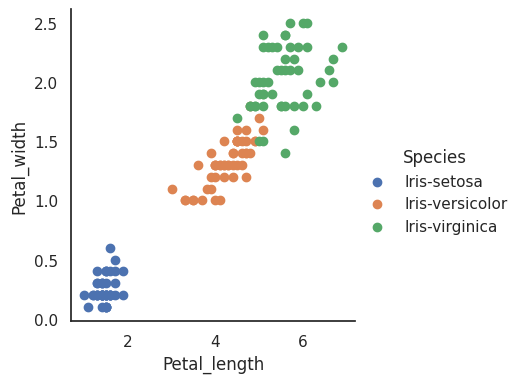

In [ ]:
#visualization of species based on their petal height and width
sns.FacetGrid(iris, hue="Species",height=4).map(plt.scatter, "Petal_length","Petal_width").add_legend()

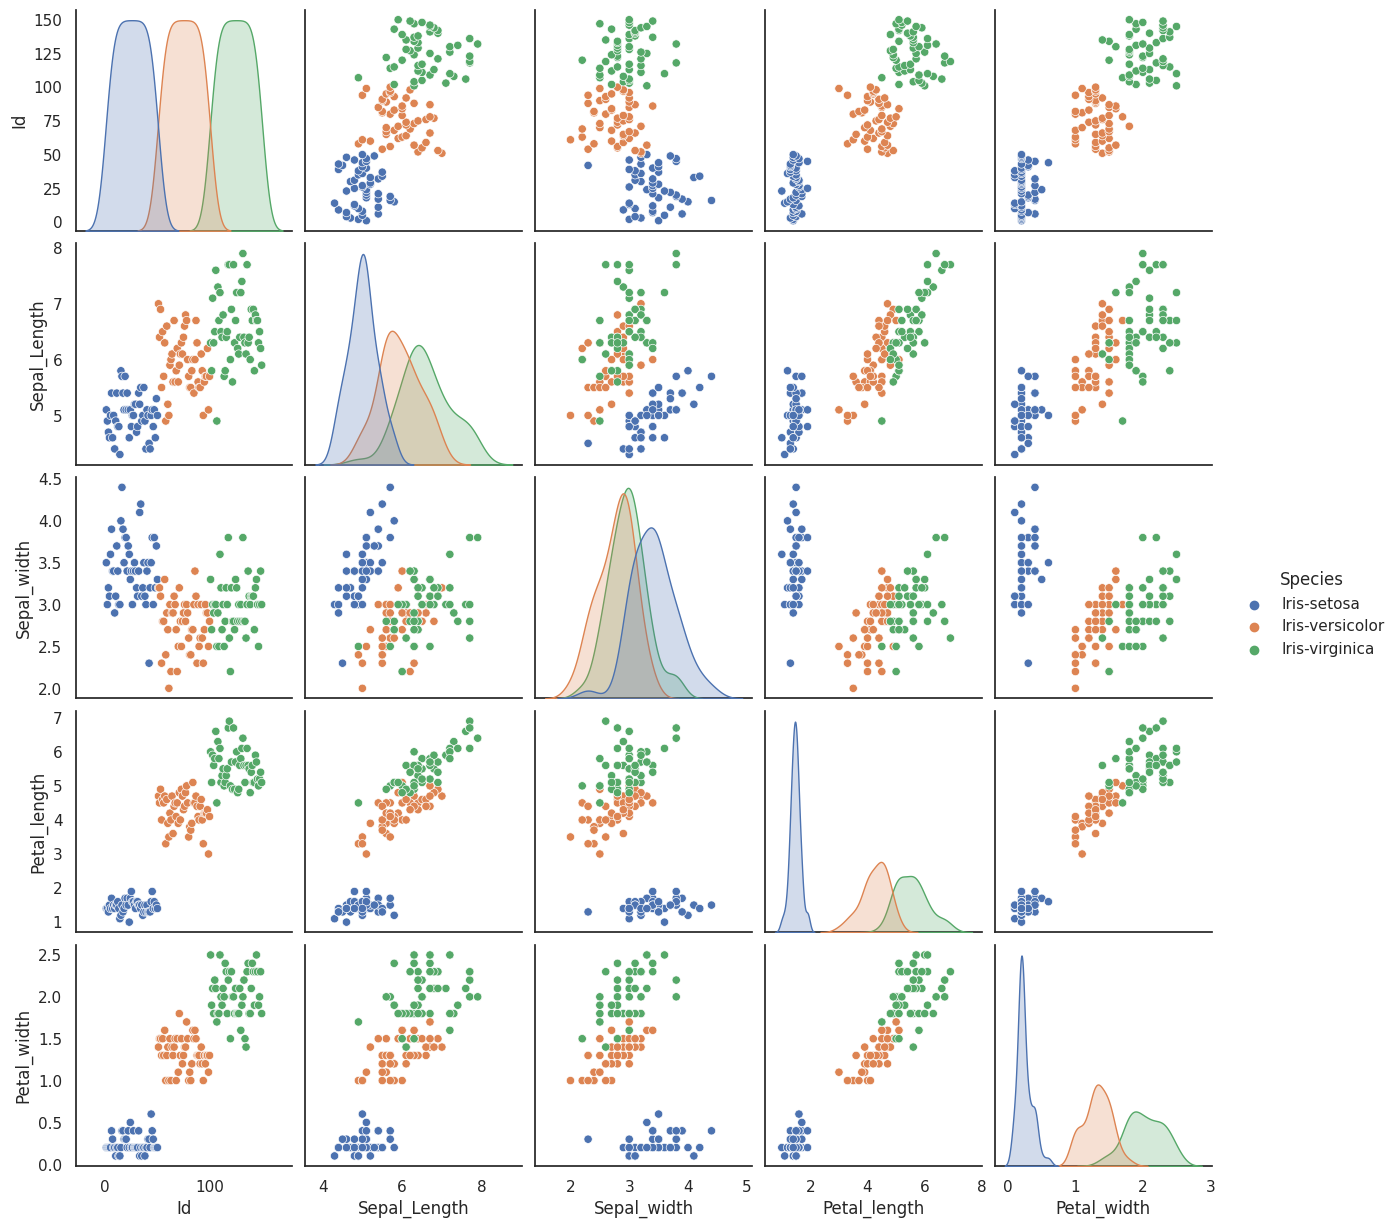

In [ ]:
sns.pairplot(iris, hue='Species')

array([[<Axes: title={'center': 'Id'}>,
        <Axes: title={'center': 'Sepal_Length'}>],
       [<Axes: title={'center': 'Sepal_width'}>,
        <Axes: title={'center': 'Petal_length'}>],
       [<Axes: title={'center': 'Petal_width'}>,
        <Axes: title={'center': 'Species'}>]], dtype=object)

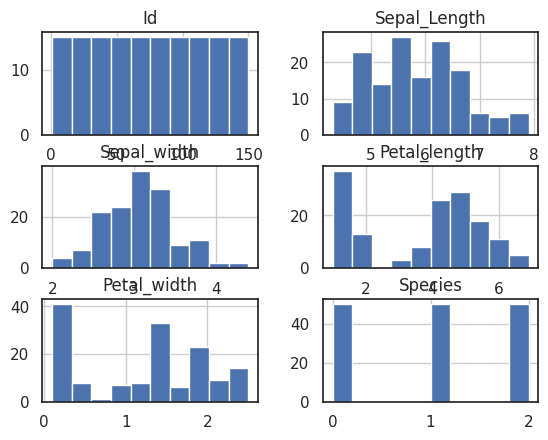

In [ ]:
#overall histogram visualization of iris flower
iris.hist()

In [ ]:
#mapping flower species
flower_mapping = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica':2}
iris["Species"] = iris["Species"].map(flower_mapping)

In [ ]:
#splitting the dataset
X = iris[["Sepal_Length","Sepal_width","Petal_length","Petal_width"]].values
y = iris[["Species"]].values

Logistic Regression

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X,y)

LogisticRegression()

Checking the accuracy

In [ ]:
model.score(X,y)

0.9733333333333334

creating prediction model

In [ ]:
expected = y
predicted = model.predict(X)
predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

creating confusion matrix


In [ ]:
print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.98      0.94      0.96        50
           2       0.94      0.98      0.96        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



In [ ]:
print(metrics.confusion_matrix(expected, predicted))

[[50  0  0]
 [ 0 47  3]
 [ 0  1 49]]
